<a href="https://colab.research.google.com/github/vvtrip/genai_udacity/blob/master/3_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch.nn as nn
import torch

In [4]:
class MLP(nn.Module):
  def __init__(self, input_size):
    super(MLP, self).__init__()
    self.hidden_layer = nn.Linear(input_size, 64)
    self.output_layer = nn.Linear(64, 1)
    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.hidden_layer(x)
    x = self.activation(x)
    x = self.output_layer(x)
    return x

In [5]:
model = MLP(input_size=10)

In [6]:
print(model)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation): ReLU()
)


In [8]:
model.forward(torch.rand(10))

tensor([0.1487], grad_fn=<ViewBackward0>)

**Loss functions:** They measure how well a model is performing by calculating the difference between the model's predictions and the actual results.

**Cross entropy loss:** This is a measure used when a model needs to choose between categories (like whether an image shows a cat or a dog), and it shows how well the model's predictions align with the actual categories.

**Mean squared error:** This shows the average of the squares of the differences between predicted numbers (like a predicted price) and the actual numbers. It's often used for predicting continuous values rather than categories.

In [9]:
loss_function = nn.CrossEntropyLoss()

# Our dataset contains a single image of a dog, where
# cat = 0 and dog = 1 (corresponding to index 0 and 1)
target_tensor = torch.tensor([1])
target_tensor

tensor([1])

In [10]:
predicted_tensor = torch.tensor([[2.0, 5.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.0486)

In [11]:
predicted_tensor

tensor([[2., 5.]])

In [12]:
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.9130)

In [13]:
# MSE LOSS
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item())

400000000.0


Due its stochastic nature, the path to optimal solution in Stochastic gradient descent is often noisy leading to oscillations in the loss function. To help with that, momentum is used for accumulating past gradients for smoother updates reducing oscillations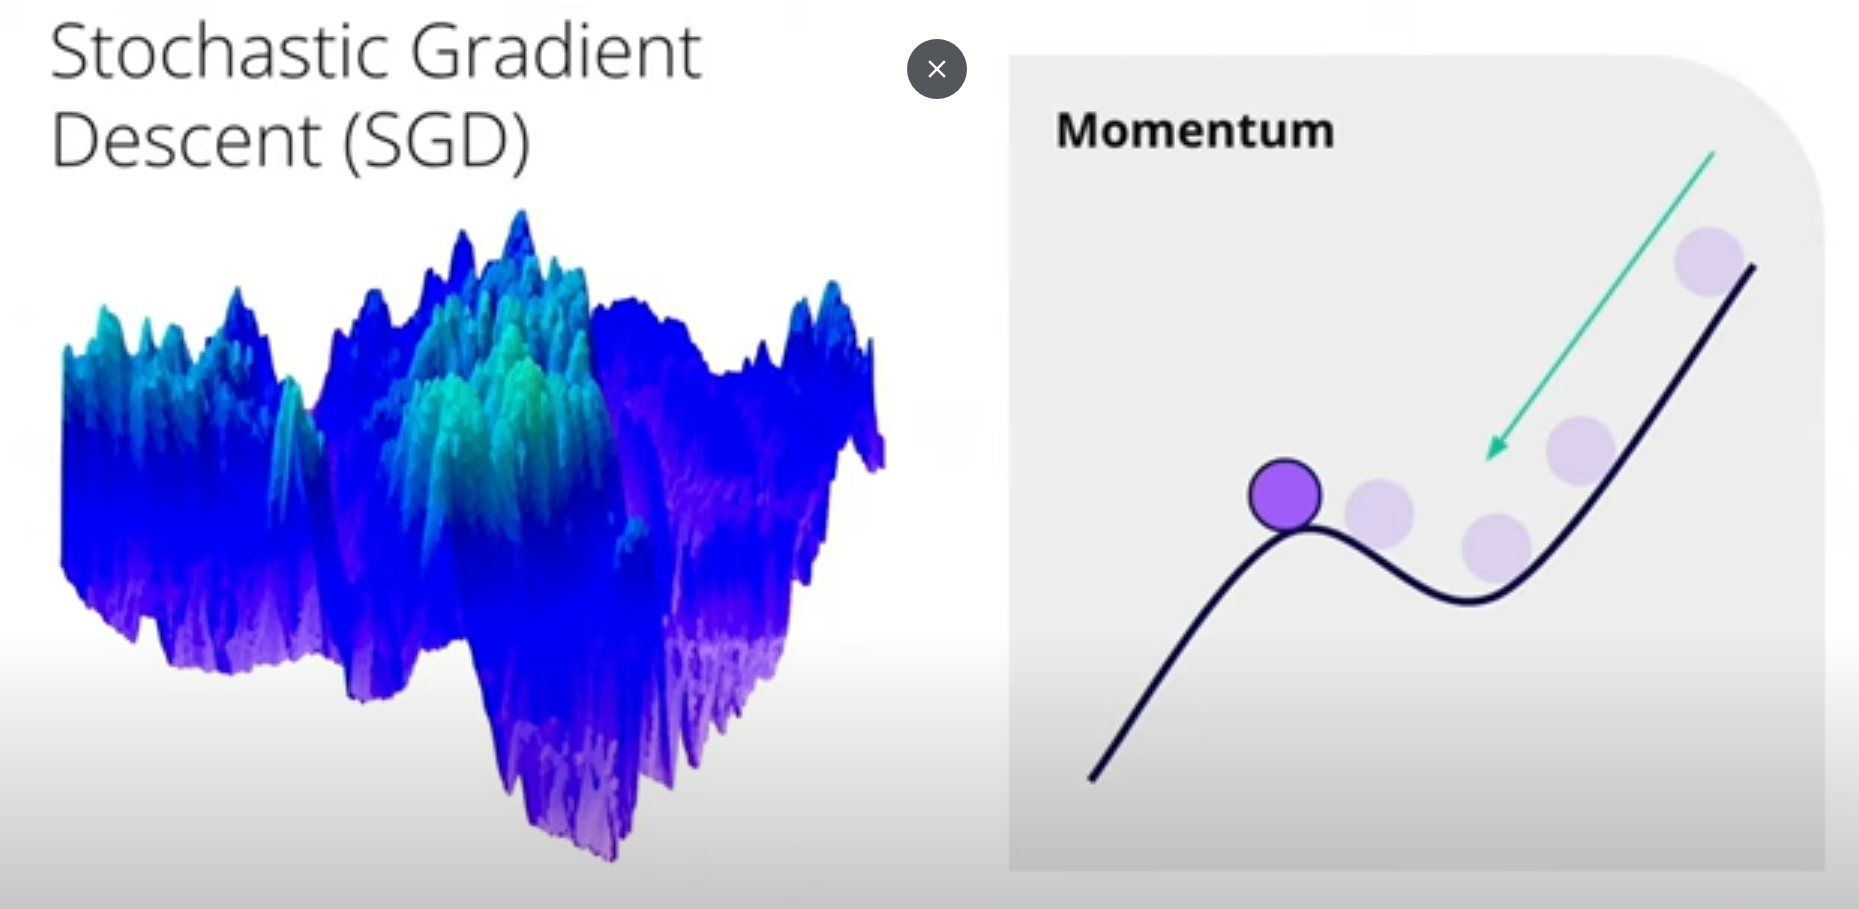


**Gradients**: Directions and amounts by which a function increases most. The parameters can be changed in a direction opposite to the gradient of the loss function in order to reduce the loss.

**Learning Rate:** This hyperparameter specifies how big the steps are when adjusting the neural network's settings during training. Too big, and you might skip over the best setting; too small, and it'll take a very long time to get there.

**Momentum:** A technique that helps accelerate the optimizer in the right direction and dampens oscillations.

In [14]:
import torch.optim as optim

In [15]:
#SGD
# momentum=0.9 smoothes out updates and can help training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [16]:
#ADAM
optimizer = optim.Adam(model.parameters(), lr=0.01)

**PyTorch Dataset class:** This is like a recipe that tells your computer how to get the data it needs to learn from, including where to find it and how to parse it, if necessary.

**PyTorch Data Loader:** Think of this as a delivery truck that brings the data to your AI in small, manageable loads called batches; this makes it easier for the AI to process and learn from the data.

**Batches:** Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way.

**Shuffle:** It means mixing up the data so that it's not in the same order every time, which helps the AI learn better.

In [17]:
from torch.utils.data import Dataset

# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

# Instantiate the dataset
dataset = NumberProductDataset(
    data_range=(0, 11)
)

# Access a data sample
data_sample = dataset[3]
print(data_sample)
# ((3, 4), 12)

((3, 4), 12)


In [18]:
for i in dataset:
  print(i)

((0, 1), 0)
((1, 2), 2)
((2, 3), 6)
((3, 4), 12)
((4, 5), 20)
((5, 6), 30)
((6, 7), 42)
((7, 8), 56)
((8, 9), 72)
((9, 10), 90)
((10, 11), 110)


In [19]:
from torch.utils.data import DataLoader

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)

[tensor([ 3,  6, 10]), tensor([ 4,  7, 11])] tensor([ 12,  42, 110])
[tensor([9, 7, 1]), tensor([10,  8,  2])] tensor([90, 56,  2])
[tensor([0, 8, 2]), tensor([1, 9, 3])] tensor([ 0, 72,  6])
[tensor([4, 5]), tensor([5, 6])] tensor([20, 30])


**Training Loop:** The cycle that a neural network goes through many times to learn from the data by making predictions, checking errors, and improving itself.

**Batches:** Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way.

**Epochs:** A complete pass through the entire training dataset. The more epochs, the more the computer goes over the material to learn.

**Loss functions:** They measure how well a model is performing by calculating the difference between the model's predictions and the actual results.

**Optimizer:** Part of the neural network's brain that makes decisions on how to change the network to get better at its job.

In [20]:
class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

In [21]:
dataset = NumberSumDataset(data_range=(1, 100))

for i in range(5):
    print(dataset[i])

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))


In [22]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [23]:
#instantiate components needed for training
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
for epoch in range(10):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))

Epoch 0: Sum of Batch Losses = 351488.53583
Epoch 1: Sum of Batch Losses = 4157.59950
Epoch 2: Sum of Batch Losses = 687.79405
Epoch 3: Sum of Batch Losses = 5.19165
Epoch 4: Sum of Batch Losses = 2.68613
Epoch 5: Sum of Batch Losses = 1.79819
Epoch 6: Sum of Batch Losses = 1.04102
Epoch 7: Sum of Batch Losses = 0.89601
Epoch 8: Sum of Batch Losses = 0.83791
Epoch 9: Sum of Batch Losses = 0.79708


In [25]:
# Test the model on 3 + 7
model(torch.tensor([3.0, 7.0]))

tensor([9.8957], grad_fn=<ViewBackward0>)

**Tokenizers:** These work like a translator, converting the words we use into smaller parts and creating a secret code that computers can understand and work with.

**Models:** These are like the brain for computers, allowing them to learn and make decisions based on information they've been fed.

**Datasets:** Think of datasets as textbooks for computer models. They are collections of information that models study to learn and improve.

**Trainers:** Trainers are the coaches for computer models. They help these models get better at their tasks by practicing and providing guidance. HuggingFace Trainers implement the PyTorch training loop for you, so you can focus instead on other aspects of working on the model.

In [26]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# See how many tokens are in the vocabulary
tokenizer.vocab_size

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

30522

In [27]:
tokens = tokenizer.tokenize("I heart Generative AI")

# Print the tokens
print(tokens)

# Show the token ids assigned to each token
print(tokenizer.convert_tokens_to_ids(tokens))

['i', 'heart', 'genera', '##tive', 'ai']
[1045, 2540, 11416, 6024, 9932]


In [28]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load a pre-trained sentiment analysis model
model_name = "textattack/bert-base-uncased-imdb"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the input sequence
tokenizer = BertTokenizer.from_pretrained(model_name)
inputs = tokenizer("I love Generative AI", return_tensors="pt")

# Make prediction
with torch.no_grad(): #no_grad means the model is used only for prediction nt for training
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities)

# Display sentiment result
if predicted_class == 1:
    print(f"Sentiment: Positive ({probabilities[0][1] * 100:.2f}%)")
else:
    print(f"Sentiment: Negative ({probabilities[0][0] * 100:.2f}%)")
# Sentiment: Positive (88.68%)

config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Sentiment: Positive (88.68%)
